# <center>Olympic Athletes</center>

### 1. Import data

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
import pylab
import statsmodels.stats as smd
from collections import Counter


In [2]:
# Load olympics data set
olympics = pd.read_csv('athlete_events.csv')
olympics.head()


ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [3]:
# Load NOC data set
noc = pd.read_csv('noc_regions.csv')
noc.head()


NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

### 2. Join data tables

In [4]:
# merge data sets on noc
data = pd.merge(olympics, noc, how='left', on='NOC', sort=False)
data.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal       region notes  
0       Basketball Men's Basketball   NaN        China   NaN  
1      Judo Men's Extra-Lightweight   NaN        China   NaN  
2           Football Men's Football   NaN      Denmark   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
4  Speed Skating Women's 500 metres   NaN  Netherlands   NaN

### 3. Filter data to get summer_olympics data set

The first major step in handling this data was to filter the data to only include the summer olympic games, as the winter games data is incomplete. 

In [7]:
# filter for summer olympics
summer_olympics = data[data['Season'] == 'Summer']
summer_olympics = pd.DataFrame(summer_olympics)
summer_olympics.head()

ID                                Name Sex   Age  Height  Weight  \
0    1                           A Dijiang   M  24.0   180.0    80.0   
1    2                            A Lamusi   M  23.0   170.0    60.0   
2    3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3    4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
26   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

              Team  NOC        Games  Year  Season         City       Sport  \
0            China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1            China  CHN  2012 Summer  2012  Summer       London        Judo   
2          Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3   Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
26     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                           Event Medal       region notes  
0    Basketball Men's Basketball   NaN        China   NaN  
1   Judo Men's Extra-Lightweight   NaN        China   NaN  
2        Football Men's Football   NaN      Denmark   NaN  
3    Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN  
26  Athletics Women's 100 metres   NaN  Netherlands   NaN

In [6]:
# Explore data
summer_olympics.describe()

ID            Age         Height        Weight  \
count  222552.000000  213363.000000  170695.000000  168698.00000   
mean    67998.925712      25.674053     175.515551      70.68906   
std     39139.038228       6.699839      10.914725      14.80394   
min         1.000000      10.000000     127.000000      25.00000   
25%     34000.750000      21.000000     168.000000      60.00000   
50%     68302.500000      24.000000     175.000000      70.00000   
75%    101881.000000      28.000000     183.000000      79.00000   
max    135568.000000      97.000000     226.000000     214.00000   

                Year  
count  222552.000000  
mean     1976.317094  
std        30.942802  
min      1896.000000  
25%      1956.000000  
50%      1984.000000  
75%      2000.000000  
max      2016.000000

In [8]:
summer_olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 222552 entries, 0 to 271110
Data columns (total 17 columns):
ID        222552 non-null int64
Name      222552 non-null object
Sex       222552 non-null object
Age       213363 non-null float64
Height    170695 non-null float64
Weight    168698 non-null float64
Team      222552 non-null object
NOC       222552 non-null object
Games     222552 non-null object
Year      222552 non-null int64
Season    222552 non-null object
City      222552 non-null object
Sport     222552 non-null object
Event     222552 non-null object
Medal     34088 non-null object
region    222182 non-null object
notes     4401 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 30.6+ MB


## Null Hypothesis:

H0: There is not a difference between physical characteristics (age, weight, height) of olympic medalists and olympic competitors
Ha: There is a difference between physical characteristics (age, weight, height) of olympic medalists and olympic competitors

### 4. Missing values

Once the data was explored, it was determined that there were missing values from the Age, Height, and Weight columns from early olympic games in the data set. As this data could not be located elsewhere, observations that were missing data from the 'Age', 'Height', or 'Weight' columns were removed. The deleted observations included athletes that did not medal in their sports during and prior to the 1920 olympic games. The refined dataset, summer_olympics, now includes 166,706 observations that each include the olympian's age, height, and weight.

Missing values in the 'Medal' column were left as is since each NaN value represents an olympian who competed but did not receive a medal in their competition. Missing values in the 'notes' column were also left intact as the notes column simply contains a more specific geographic region for certain players (ex: athletes representing Trinidad/Tobago have a specific island origin location designated in the notes column). 

In [9]:
#Remove NaN values from age/height/weight columns
summer_olympics = summer_olympics.dropna(subset=['Age', 'Height', 'Weight'])
summer_olympics.head()


ID                Name Sex   Age  Height  Weight     Team  NOC  \
0    1           A Dijiang   M  24.0   180.0    80.0    China  CHN   
1    2            A Lamusi   M  23.0   170.0    60.0    China  CHN   
31  12   Jyri Tapani Aalto   M  31.0   172.0    70.0  Finland  FIN   
32  13  Minna Maarit Aalto   F  30.0   159.0    55.5  Finland  FIN   
33  13  Minna Maarit Aalto   F  34.0   159.0    55.5  Finland  FIN   

          Games  Year  Season       City       Sport  \
0   1992 Summer  1992  Summer  Barcelona  Basketball   
1   2012 Summer  2012  Summer     London        Judo   
31  2000 Summer  2000  Summer     Sydney   Badminton   
32  1996 Summer  1996  Summer    Atlanta     Sailing   
33  2000 Summer  2000  Summer     Sydney     Sailing   

                           Event Medal   region notes  
0    Basketball Men's Basketball   NaN    China   NaN  
1   Judo Men's Extra-Lightweight   NaN    China   NaN  
31       Badminton Men's Singles   NaN  Finland   NaN  
32    Sailing Women's Windsurfer   NaN  Finland   NaN  
33    Sailing Women's Windsurfer   NaN  Finland   NaN

In [10]:
#Check for any other NaN values in unexpected places
summer_olympics.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 166706 entries, 0 to 271110
Data columns (total 17 columns):
ID        166706 non-null int64
Name      166706 non-null object
Sex       166706 non-null object
Age       166706 non-null float64
Height    166706 non-null float64
Weight    166706 non-null float64
Team      166706 non-null object
NOC       166706 non-null object
Games     166706 non-null object
Year      166706 non-null int64
Season    166706 non-null object
City      166706 non-null object
Sport     166706 non-null object
Event     166706 non-null object
Medal     25341 non-null object
region    166436 non-null object
notes     3132 non-null object
dtypes: float64(3), int64(2), object(12)
memory usage: 22.9+ MB


### 5. Exploratory Data Analysis

Text(0.5, 0.98, 'Fig. 1: Age, Height, and Weight of Olympic Athletes')

<Figure size 432x288 with 0 Axes>

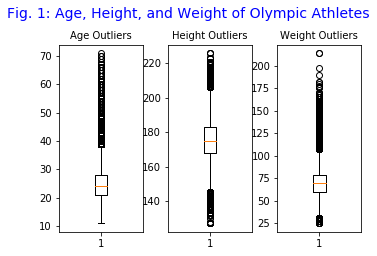

In [11]:
#Search for outliers and trends

fig = plt.figure()
fig, ax = plt.subplots(1, 3)

plt.subplot(1, 3, 1)
plt.boxplot(summer_olympics.Age)
plt.title('Age Outliers', fontsize=10)

plt.subplot(1, 3, 2)
plt.boxplot(summer_olympics.Height)
plt.title('Height Outliers', fontsize=10)

plt.subplot(1, 3, 3)
plt.boxplot(summer_olympics.Weight)
plt.title('Weight Outliers', fontsize=10)

plt.subplots_adjust(left= 0.2, top=0.85, bottom=0.2, wspace=0.3, hspace=0.4)

fig.suptitle('Fig. 1: Age, Height, and Weight of Olympic Athletes', fontsize=14, color='blue')

The first step in exploring the data was to look for outliers in the data set using the .describe call above and the boxplots in Figure 1. Looking at all of the observations age reveals a median age of 24 with outliers above 39 years of age. In the boxplot for height outliers, we see that the median for height is 175 cm, with outliers being shorter than 150 cm or taller than 205 cm. Lastly, from the Weight Outliers plot, we see that the median weight of athletes is right at 70kg, with outliers weighing less than 30 kg or more than 105 kg. 

The next step in exploring the data was to determine if there is a trend in medalists. This was done by first filtering the data to only include athletes who scored first (gold), second (silver), or third (bronze) in their event competition. Using the same information, we see that the median age of medaling athletes shifts to 25 (from 24), the median height is slightly higher at 178cm for medalists (compared to 175 cm), and the median weight is 73 kg for medalists (compared to 70 kg).

In [12]:
#restrict data to medalists 
medalists = summer_olympics.dropna(subset= ['Medal'])
medalists.describe()

ID           Age        Height        Weight          Year
count   25341.000000  25341.000000  25341.000000  25341.000000  25341.000000
mean    70096.563829     25.317391    178.030307     73.940294   1987.042737
std     38944.588897      5.121130     11.252503     15.353146     23.455194
min        17.000000     13.000000    136.000000     28.000000   1896.000000
25%     37019.000000     22.000000    170.000000     63.000000   1972.000000
50%     69870.000000     25.000000    178.000000     73.000000   1992.000000
75%    104161.000000     28.000000    185.000000     83.000000   2004.000000
max    135563.000000     66.000000    223.000000    182.000000   2016.000000

Text(0.5, 0.98, 'Fig. 2: Age, Height, and Weight of Olympic Medalists')

<Figure size 432x288 with 0 Axes>

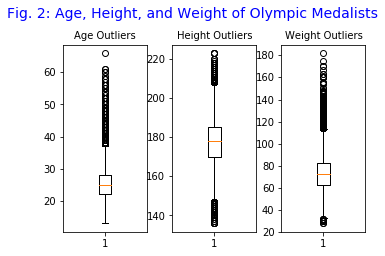

In [13]:
#Search for outliers and trends in medalist data

fig = plt.figure()
fig, ax = plt.subplots(1, 3)

plt.subplot(1, 3, 1)
plt.boxplot(medalists.Age)
plt.title('Age Outliers', fontsize=10)

plt.subplot(1, 3, 2)
plt.boxplot(medalists.Height)
plt.title('Height Outliers', fontsize=10)

plt.subplot(1, 3, 3)
plt.boxplot(medalists.Weight)
plt.title('Weight Outliers', fontsize=10)

plt.subplots_adjust(left= 0.2, top=0.85, bottom=0.2, wspace=0.3, hspace=0.4)

fig.suptitle('Fig. 2: Age, Height, and Weight of Olympic Medalists', fontsize=14, color='blue')

From the plot above, we see that there is a difference in outliers for olympic medalists compared to the outliers for all olympians. The median age shifts slightly from 24 to 25 years of age, with outliers being anyone above the age of 36. The median height shifts slightly as well, from 175 cm to 178 cm, though outlier range for this group remains about the same. The median weight also shifts slightly higher, to 73 kg from 70 kg. 

Using only the medalist data, the next step was to determine if there is a relationship between any of the variables measured. The pairplot below provides some insight into the data, showing a positive correlation between height/weight and age/weight. Additioanlly from the pair plots, we can see an increasing range of weight and height each year the olympics was held.  

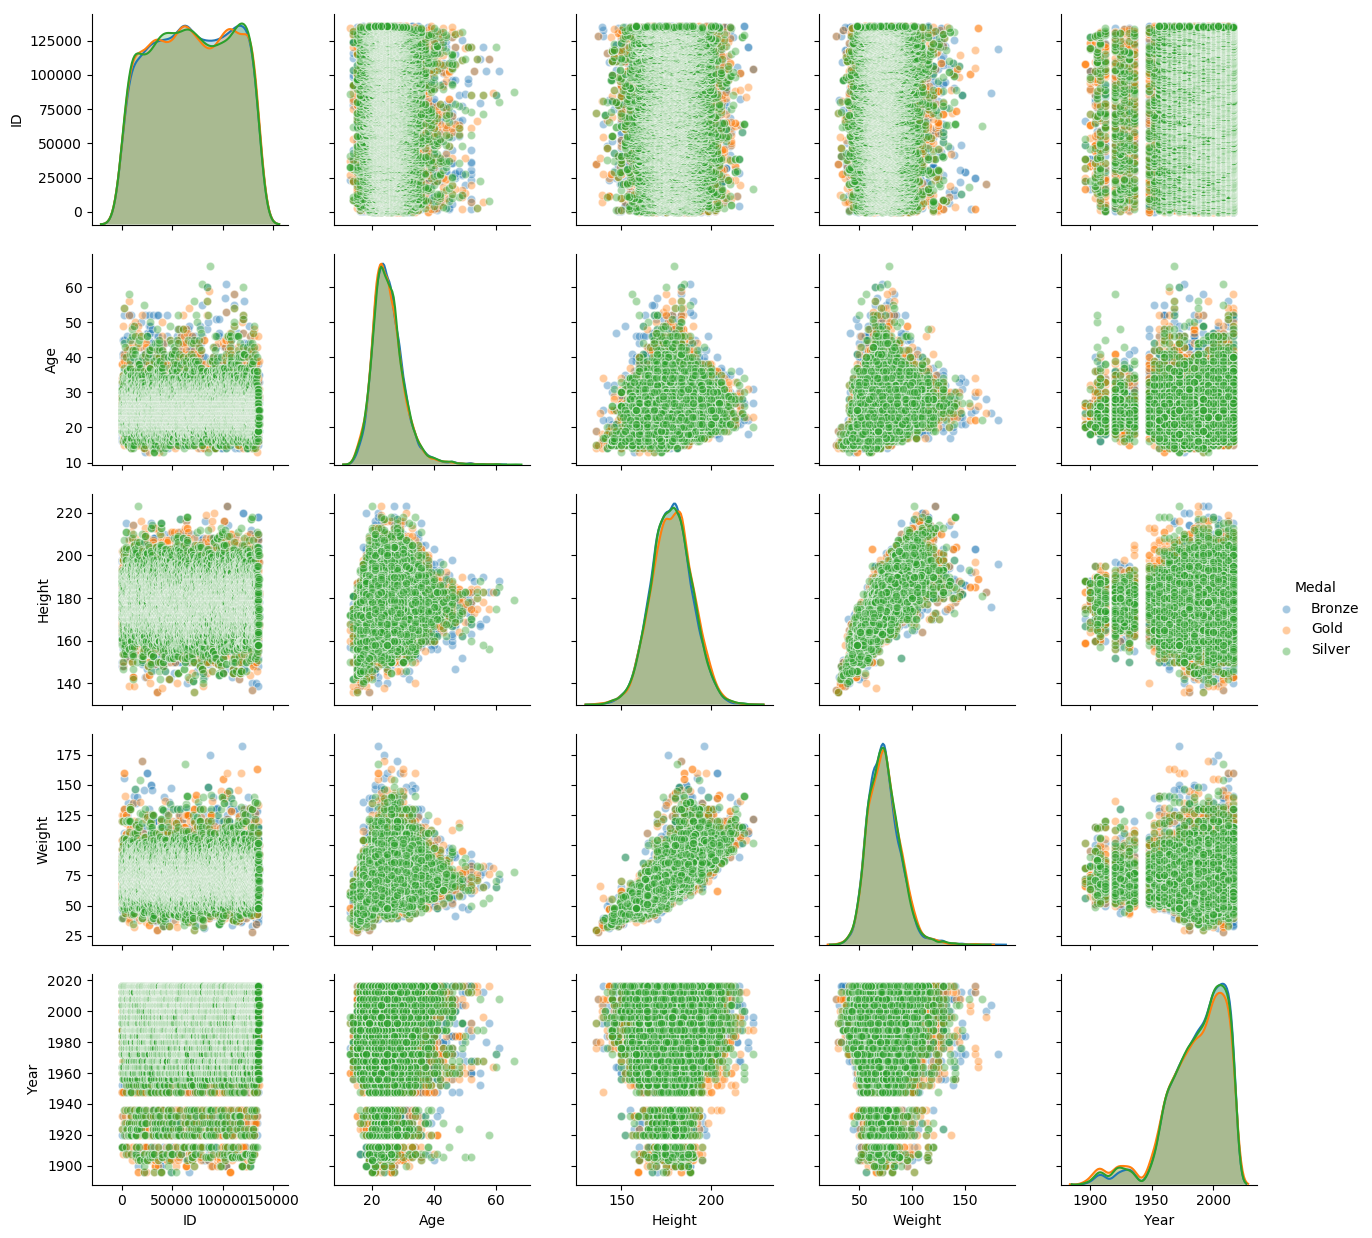

In [14]:
#pairplot for summer_olympics, colored by medal
plt.style.use('default')
sns.pairplot(summer_olympics, hue='Medal', plot_kws={'alpha':0.40})



Given the positive correlation between weight/height and age/height, pair plots (below) were also constructed to see if these trends held across sports for all athletes. 



C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


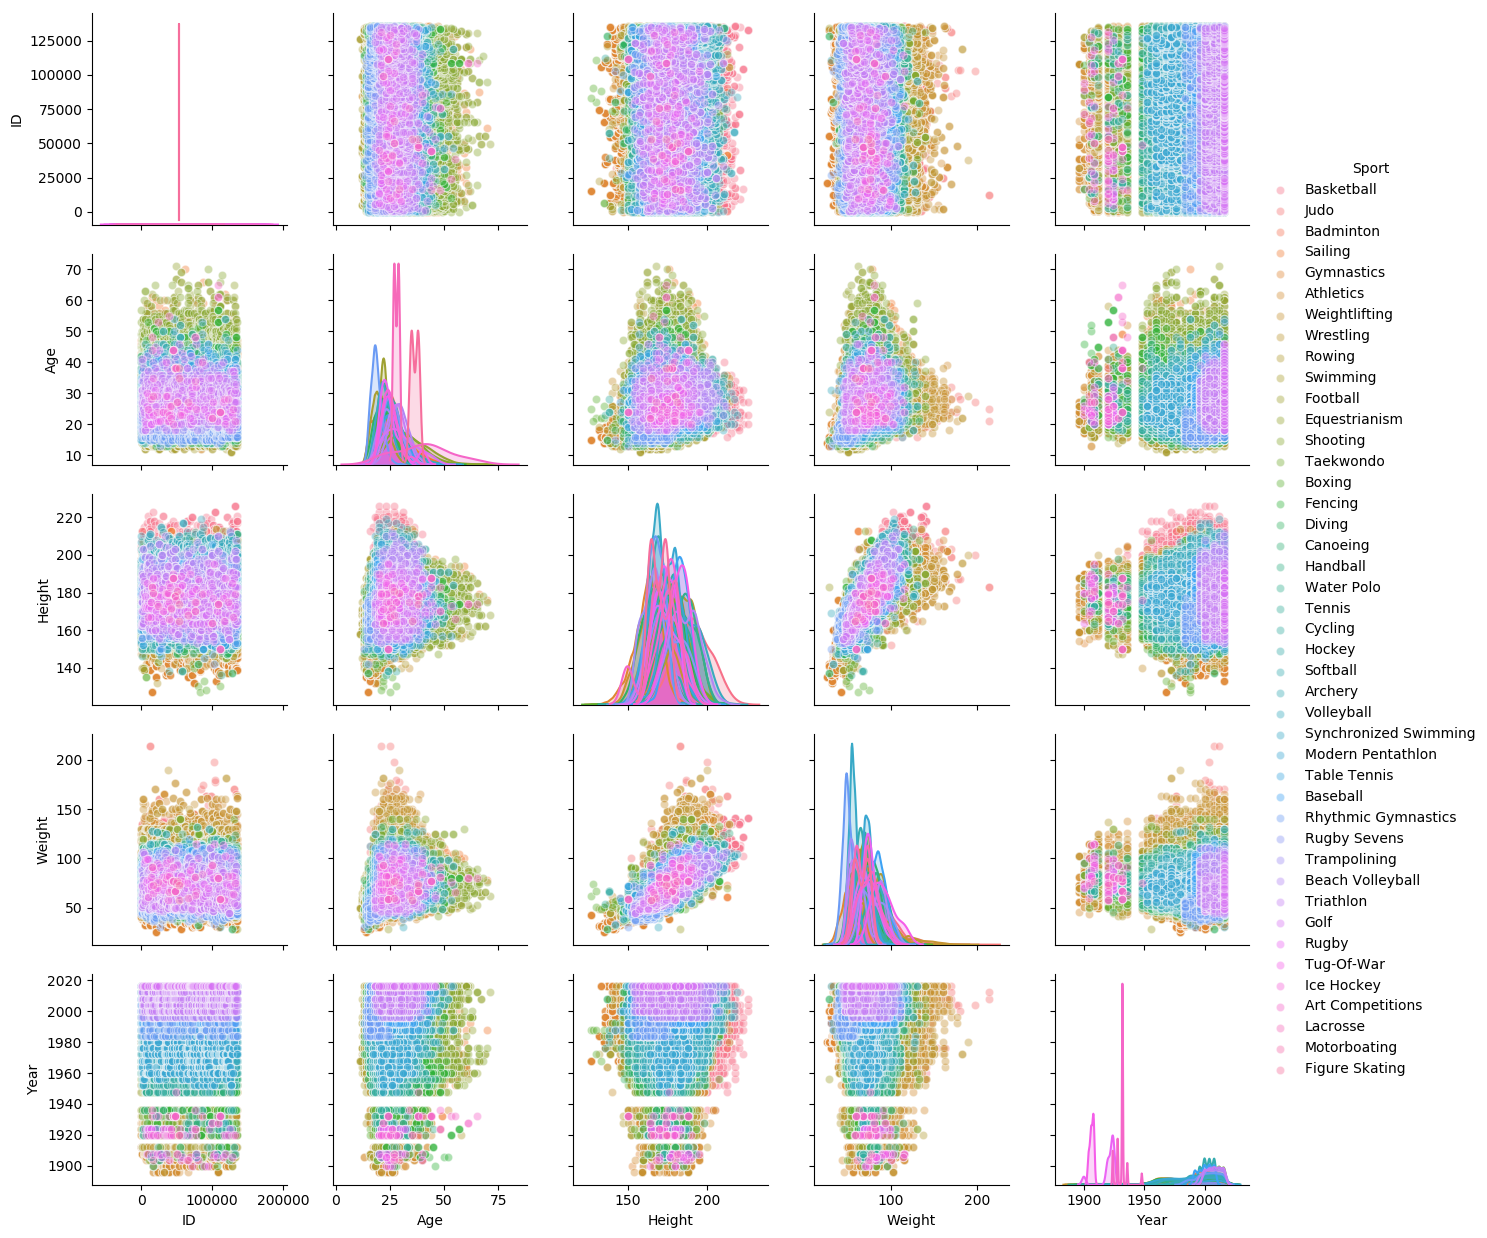

In [15]:
#pairplot for summer_olympics, colored by sport
sns.pairplot(summer_olympics, hue='Sport', plot_kws={'alpha':0.40})

Although the pair plots above are a bit jumbled due to the large number of sports, some interesting trends start to emerge. The first noticeable trend that appears is between age and sport; the majority of physically demanding sports tend to have olympians that are below 35 in age, while equestrian sports and art competitions tend to have olympians that are above 45 in age. Another trend that becomes appparent is between weight/height and sport. There are several outliers that appear in the pairplot for height/weight but the sports tend to be clustered together for height/weight ranges. The last noticeable trend is that the age, height, and weight have all increased in range over the years but narrowed with the last summer olympic competition (2016, Rio de Janeiro). 

The last pair plot that will be run across all data separates the data by the athlete's sex. As expected, some trends emerge. 

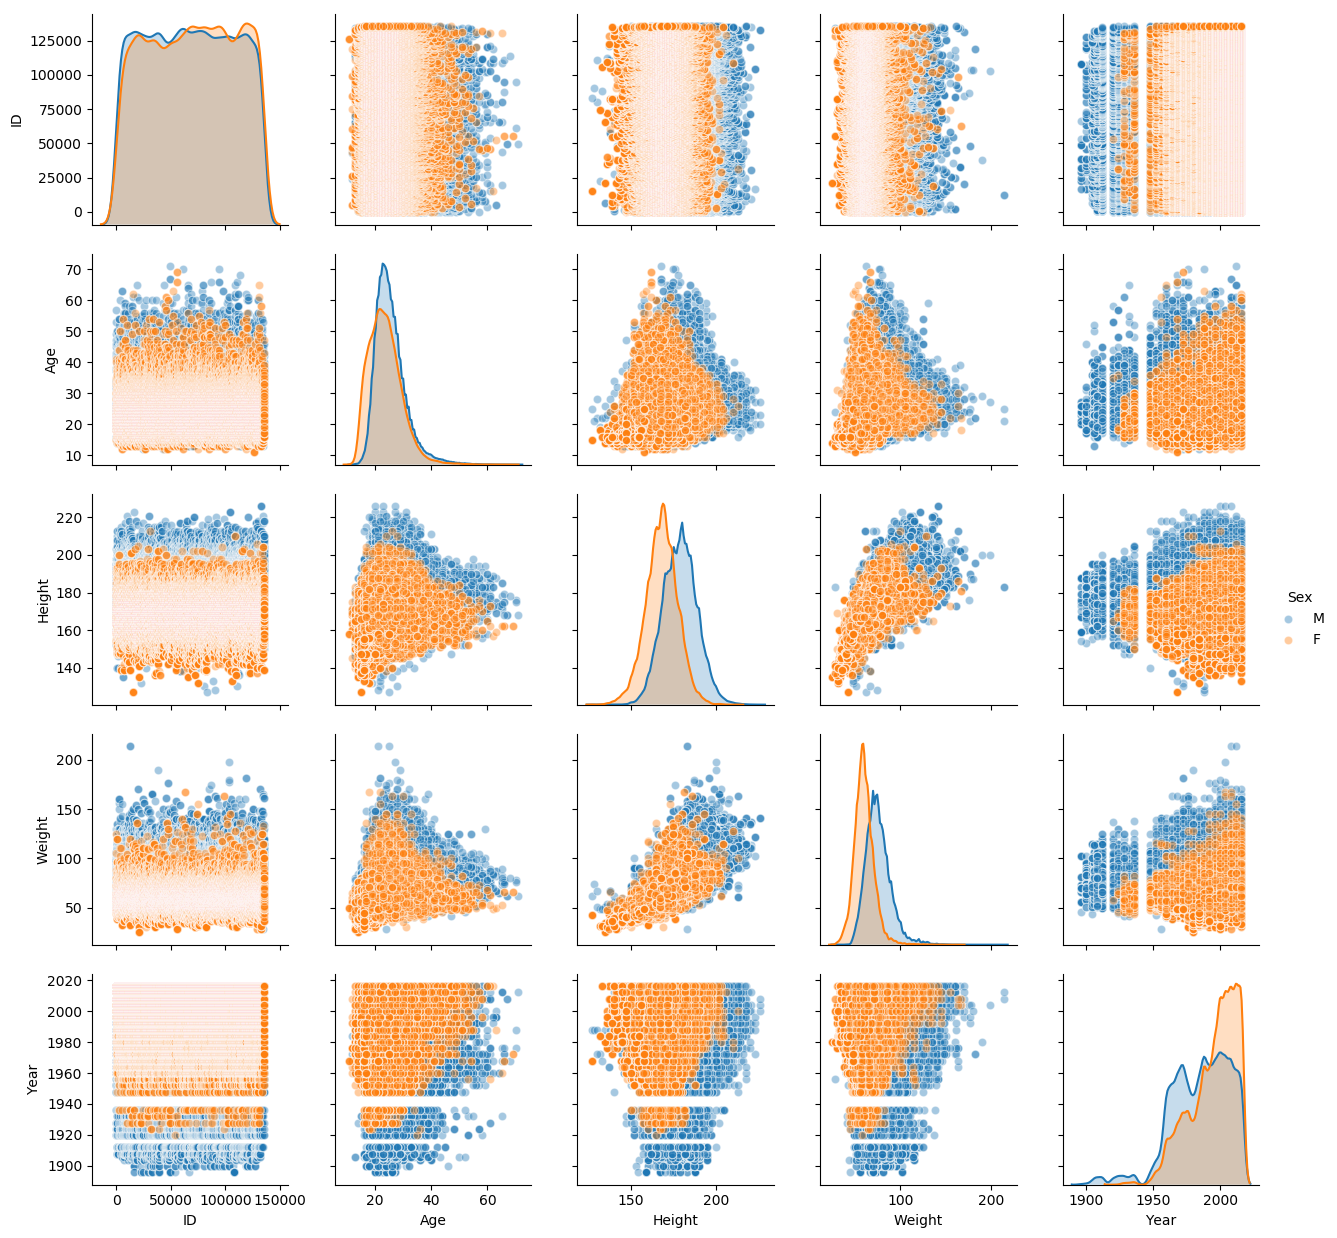

In [16]:
#pairplot for summer_olympics, colored by sex
sns.pairplot(summer_olympics, hue='Sex', plot_kws={'alpha':0.40})

Separating the charts by sex reveals well-known patterns: female athletes generally (but not always) weigh less than the male athletes and are generally shorter. Interestingly, the female athletes also tend to be younger than the male athletes (though there are very clearly a handful of outliers). Despite these differences, there is still a clear, positive correlation between height/weight and age/height for both sexes.

## 6. Exploratory Data Analysis

Based on the pair plots above, it is reasonable to conclude that age, height, and weight can all have an impact on the selection of an olympic athlete. From the second pair plots, it is clear that an ideal athlete's physique will vary from sport to sport. Swimmers are generally known for being tall and thin while gymnasts are generally shorter in stature and lighter in weight. 

To best analyze the data, it is further restricted to include five sports of interest: swimming, gymnastics, diving, equestrianism, and athletics (track and field events). Each of these olympic sports consists of several events that feature both genders and each event has a long history of inclusion in the summer olympic games, providing enough observations to make reasonable conclusions. Additionally, equestrian sports were included as the competitions tend to feature athletes who are considered outliers in age, height, and weight. 

In [17]:
# Filter data to include only observations from 5 chosen sports
so_sports = ['Swimming', 'Gymnastics', 'Diving', 'Equestrianism', 'Athletics']
sum_olymp = summer_olympics[summer_olympics.Sport.isin(so_sports)]
sum_olymp

ID                                       Name Sex   Age  Height  \
41          17                    Paavo Johannes Aaltonen   M  28.0   175.0   
42          17                    Paavo Johannes Aaltonen   M  28.0   175.0   
43          17                    Paavo Johannes Aaltonen   M  28.0   175.0   
44          17                    Paavo Johannes Aaltonen   M  28.0   175.0   
45          17                    Paavo Johannes Aaltonen   M  28.0   175.0   
46          17                    Paavo Johannes Aaltonen   M  28.0   175.0   
47          17                    Paavo Johannes Aaltonen   M  28.0   175.0   
48          17                    Paavo Johannes Aaltonen   M  28.0   175.0   
49          17                    Paavo Johannes Aaltonen   M  32.0   175.0   
50          17                    Paavo Johannes Aaltonen   M  32.0   175.0   
51          17                    Paavo Johannes Aaltonen   M  32.0   175.0   
52          17                    Paavo Johannes Aaltonen   M  32.0   175.0   
53          17                    Paavo Johannes Aaltonen   M  32.0   175.0   
54          17                    Paavo Johannes Aaltonen   M  32.0   175.0   
55          17                    Paavo Johannes Aaltonen   M  32.0   175.0   
56          17                    Paavo Johannes Aaltonen   M  32.0   175.0   
57          18                       Timo Antero Aaltonen   M  31.0   189.0   
94          31                          Evald rma (rman-)   M  24.0   174.0   
98          34         Jamale (Djamel-) Aarrass (Ahrass-)   M  30.0   187.0   
100         36                       Stefan Remco Aartsen   M  21.0   194.0   
101         36                       Stefan Remco Aartsen   M  21.0   194.0   
102         36                       Stefan Remco Aartsen   M  21.0   194.0   
103         36                       Stefan Remco Aartsen   M  25.0   194.0   
104         36                       Stefan Remco Aartsen   M  25.0   194.0   
118         43                      Morten Gjerdrum Aasen   M  34.0   185.0   
130         47                       Erling Rudolf Aastad   M  22.0   177.0   
131         47                       Erling Rudolf Aastad   M  22.0   177.0   
132         47                       Erling Rudolf Aastad   M  26.0   177.0   
133         47                       Erling Rudolf Aastad   M  30.0   177.0   
135         49                               Moonika Aava   F  24.0   168.0   
...        ...                                        ...  ..   ...     ...   
270943  135489      Anastasiya Valeryevna Zuyeva-Fesikova   F  26.0   182.0   
270959  135497                              Lloyd Zvasiya   M  23.0   190.0   
270968  135501  Ellina Aleksandrovna Zvereva (Kisheyeva-)   F  27.0   183.0   
270969  135501  Ellina Aleksandrovna Zvereva (Kisheyeva-)   F  35.0   183.0   
270970  135501  Ellina Aleksandrovna Zvereva (Kisheyeva-)   F  39.0   183.0   
270971  135501  Ellina Aleksandrovna Zvereva (Kisheyeva-)   F  43.0   183.0   
270972  135501  Ellina Aleksandrovna Zvereva (Kisheyeva-)   F  47.0   183.0   
271011  135522            Klaas Erik "Klaas-Erik" Zwering   M  19.0   189.0   
271012  135522            Klaas Erik "Klaas-Erik" Zwering   M  19.0   189.0   
271013  135522            Klaas Erik "Klaas-Erik" Zwering   M  23.0   189.0   
271025  135529                     Vlastimil Zwiefelhofer   M  27.0   170.0   
271027  135531       Sabine Beate Zwiener (-Jauchstetter)   F  24.0   172.0   
271029  135533      Petronella Veronica Maria "Nel" Zwier   F  23.0   174.0   
271044  135543                 Victor Andrew "Vic" Zwolak   M  25.0   175.0   
271045  135544                         Krzysztof Zwoliski   M  21.0   175.0   
271046  135544                         Krzysztof Zwoliski   M  21.0   175.0   
271052  135547              Viktoriya Viktorovna Zyabkina   F  19.0   174.0   
271053  135547              Viktoriya Viktorovna Zyabkina   F  23.0   174.0   
271054  135547              Viktoriya Viktorovna Zyabkina   F 

In [18]:
# Filter medalists data to include only observations from 5 chosen sports
md = medalists[medalists.Sport.isin(so_sports)]
md

ID                                               Name Sex   Age  \
41          17                            Paavo Johannes Aaltonen   M  28.0   
42          17                            Paavo Johannes Aaltonen   M  28.0   
44          17                            Paavo Johannes Aaltonen   M  28.0   
48          17                            Paavo Johannes Aaltonen   M  28.0   
50          17                            Paavo Johannes Aaltonen   M  32.0   
163         67            Mariya Vasilyevna Abakumova (-Tarabina)   F  22.0   
191         86                            Jos Manuel Abascal Gmez   M  26.0   
476        259                                         Reema Abdo   F  21.0   
620        359                     Andrey Khakimovich Abduvaliyev   M  26.0   
655        379                                        Addis Abebe   M  21.0   
677        394                                         Irene Abel   F  19.0   
684        395                                      Jennifer Abel   F  20.0   
720        411                                     Gezahgne Abera   M  22.0   
727        416                                    Nils Georg berg   M  19.0   
728        416                                    Nils Georg berg   M  19.0   
747        428                                  Elvan Abeylegesse   F  25.0   
787        454                          Edgar Allen "Ed" Ablowich   M  19.0   
789        455                        Denis Mikhaylovich Ablyazin   M  19.0   
790        455                        Denis Mikhaylovich Ablyazin   M  19.0   
794        455                        Denis Mikhaylovich Ablyazin   M  24.0   
796        455                        Denis Mikhaylovich Ablyazin   M  24.0   
797        455                        Denis Mikhaylovich Ablyazin   M  24.0   
803        460                         Viktor Andreyevich Aboimov   M  22.0   
804        460                         Viktor Andreyevich Aboimov   M  22.0   
814        465                               Matthew "Matt" Abood   M  30.0   
892        509                                       Gary Abraham   M  21.0   
915        519                            Harold Maurice Abrahams   M  24.0   
917        519                            Harold Maurice Abrahams   M  24.0   
929        527                      Erik Adolf Efraim Abrahamsson   M  22.0   
1089       610                                Ginko Abukawa-Chiba   F  26.0   
...        ...                                                ...  ..   ...   
270431  135269                                            Zou Kai   M  20.0   
270432  135269                                            Zou Kai   M  20.0   
270433  135269                                            Zou Kai   M  20.0   
270434  135269                                            Zou Kai   M  24.0   
270435  135269                                            Zou Kai   M  24.0   
270436  135269                                            Zou Kai   M  24.0   
270483  135291                       Roman Volodymyrovych Zozulia   M  21.0   
270530  135302                                      Iris Zscherpe   F  17.0   
270550  135313                                     Gyula Zsivtzky   M  23.0   
270551  135313                                     Gyula Zsivtzky   M  27.0   
270552  135313                                     Gyula Zsivtzky   M  31.0   
270564  135322  Nathalie Xenia Margareta Benedikte zu Sayn-Wit...   F  33.0   
270696  135379                             Erika Zuchold (Barth-)   F  21.0   
270698  135379                             Erika Zuchold (Barth-)   F  21.0   
270702  135379                             Erika Zuchold (Barth-)   F  25.0   
270704  135379                             Erika Zuchold (Barth-)   F  25.0   
270705  135379                             Erika Zuchold (Barth-)   F  25.0   
270732  135396                           Martijn Hendrik Zuijdweg   M  23.0   
270761  135409                                Mauro Carlo Zuli

Separate dataframes were also created for each event analyzed, separate of the joint data set, to better aid in statistical analysis. 

In [19]:
# Create each sport as its own dataframe

# Create dataframe (swim) with swimming competition data
swim = summer_olympics[summer_olympics['Sport'] == 'Swimming']
swim_medals = md[md['Sport'] == 'Swimming'] 

# Create dataframe (gymnastics) with gymnastics competition data
gymnastics = summer_olympics[summer_olympics['Sport'] == 'Gymnastics']
gymnastics_medals = md[md['Sport'] == 'Gymnastics']

# Create dataframe (diving) with diving competition data
diving = summer_olympics[summer_olympics['Sport'] == 'Diving']
diving_medals = md[md['Sport'] == 'Diving']

# Create dataframe (eques) with equestrian competition data
eques = summer_olympics[summer_olympics['Sport'] == 'Equestrianism']
eques_medals = md[md['Sport'] == 'Equestrianism']

# Create dataframe (athletics) with athletics (track and field) competition data
athletics = summer_olympics[summer_olympics['Sport'] == 'Athletics']
athletics_medals = md[md['Sport'] == 'Athletics']

print('The shape of the data is:\n swim:{}\n gymanstics:{}\n diving:{}\n equestrian:{}\n athletics:{}'.format(swim.shape, gymnastics.shape, diving.shape, eques.shape,athletics.shape))

The shape of the data is:
 swim:(18776, 17)
 gymanstics:(18271, 17)
 diving:(2011, 17)
 equestrian:(4553, 17)
 athletics:(32374, 17)


With fewer sports, the data was replotted using pair plots to determine if a relationship exists between the variables. 

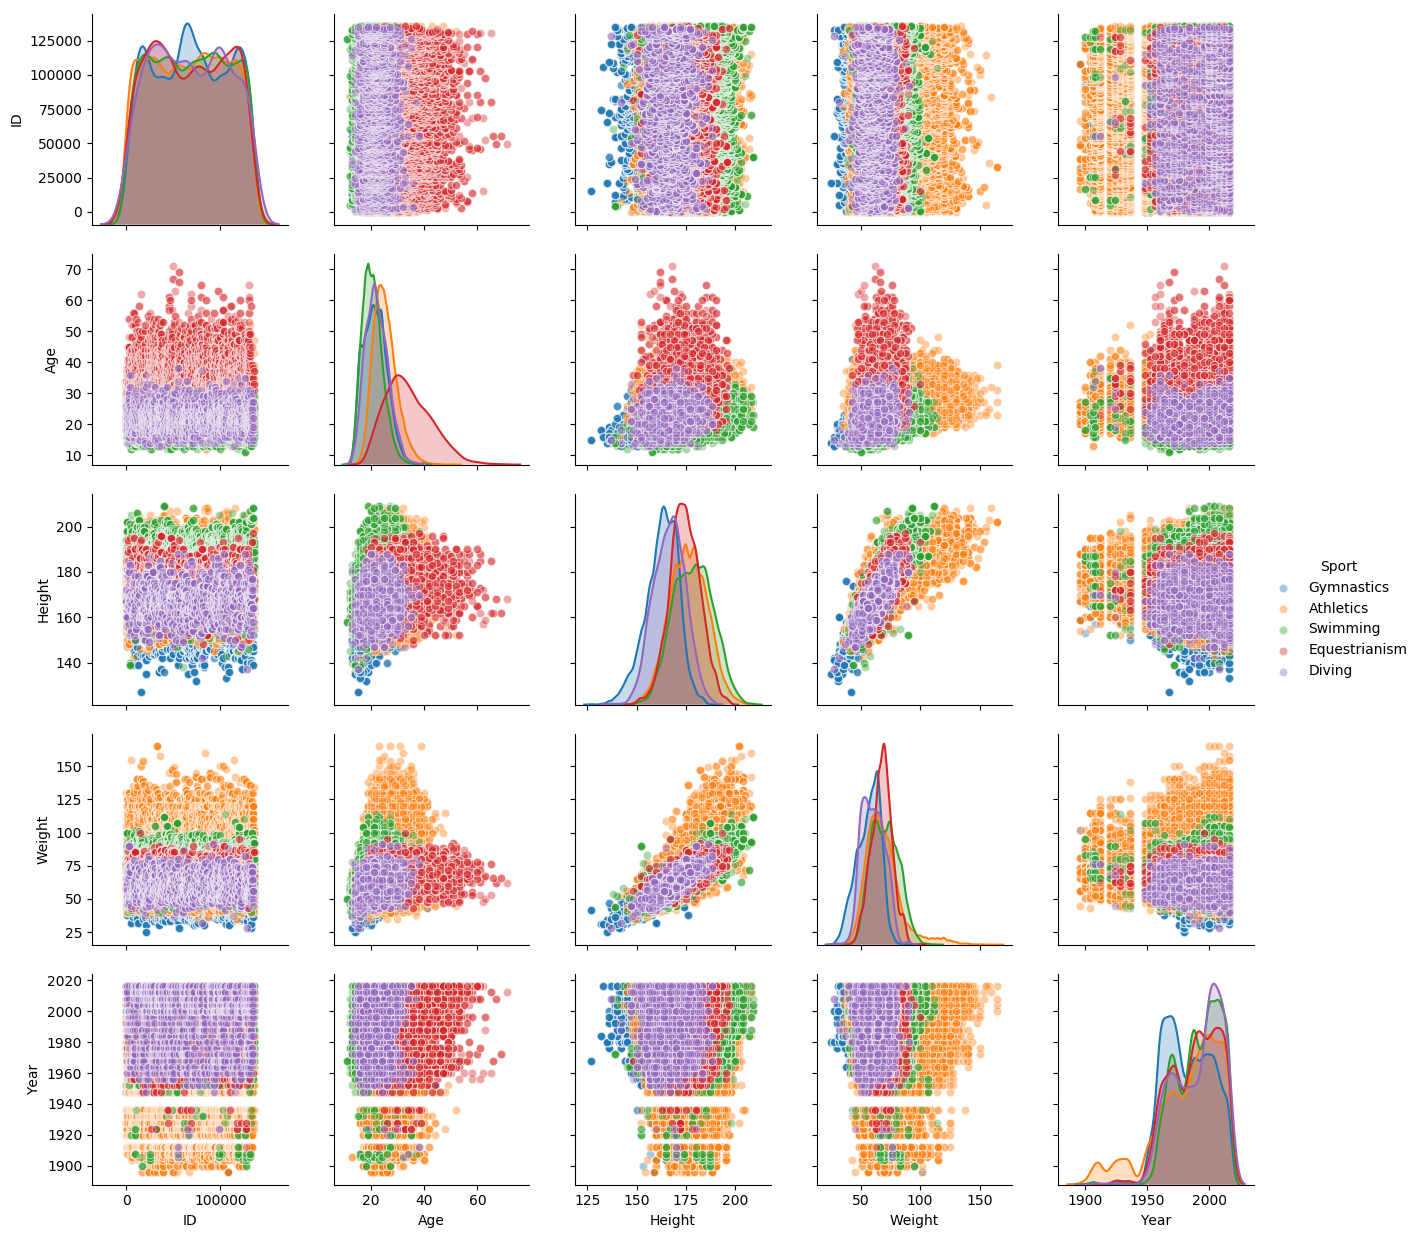

In [20]:
plt.style.use('default')
sns.pairplot(sum_olymp, hue='Sport', plot_kws={'alpha':0.40})

From the pair plots above, a better view of trends starts to emerge. Age, weight, and height each clearly differ by sport, with some overlap between sports. 

To better analyze each relevant variable, three histograms plots were created to compare the age, weight, and height of athletes in each of the selected sports against the histograms for all olympians.

<Figure size 1500x850 with 0 Axes>

<Figure size 640x480 with 0 Axes>

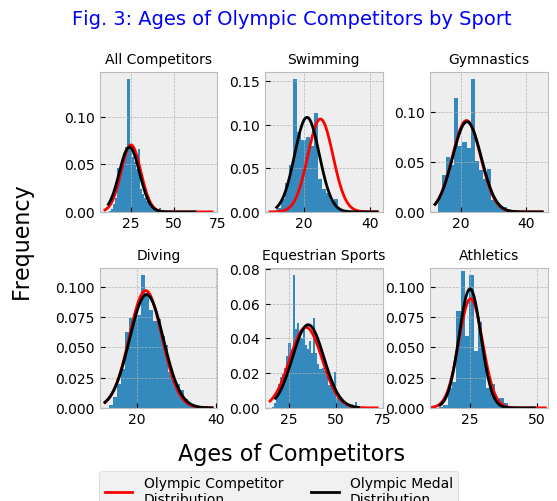

In [21]:
# Create a series of subplots comparing normal distribution of ages of olympic competitors, separated by sport
# Set chart size/style
plt.figure(figsize=(15,8.5))
plt.style.use('bmh')

fig = plt.figure()
fig, ax = plt.subplots(2, 3)

# Histogram of Olympian's ages at competition
plt.subplot(2, 3, 1)
plt.hist(summer_olympics.Age, bins=50, density=True)
plt.title('All Competitors', fontsize=10)

# overlay of normal distribution for all olympians
so_age = summer_olympics[['Age']]
x = np.linspace(np.min(so_age) - 1, np.max(so_age) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(so_age), scale=np.std(so_age)) for _ in x]
plt.plot(x, pdf, 'k-', color='red')

# overlay of normal distribution for all olympic medalists
md_age = md[['Age']]
x = np.linspace(np.min(md_age) - 1, np.max(md_age) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(md_age), scale=np.std(md_age)) for _ in x]
plt.plot(x, pdf, 'k-')

# Histogram of Swimmers' ages at competition
plt.subplot(2, 3, 2)
plt.hist(swim.Age, bins=25, density=True)
plt.title('Swimming', fontsize=10)

# Overlay of normal distribution for swimming
sw_age = swim[['Age']]
x = np.linspace(np.min(sw_age) - 1, np.max(sw_age) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(so_age), scale=np.std(sw_age)) for _ in x]
plt.plot(x, pdf, 'k-', color='red')

# Overlay of normal distribution for medalist swimmers
mds_age = swim_medals[['Age']]
x = np.linspace(np.min(mds_age) - 1, np.max(mds_age) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(mds_age), scale=np.std(mds_age)) for _ in x]
plt.plot(x, pdf, 'k-')

# Histogram of gymnasts' ages at competition
plt.subplot(2, 3, 3)
plt.hist(gymnastics.Age, bins=25, density=True)
plt.title('Gymnastics', fontsize=10)

# Overlay of normal distribution for gymnasts
gm_age = gymnastics[['Age']]
x = np.linspace(np.min(gm_age) - 1, np.max(gm_age) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(gm_age), scale=np.std(gm_age)) for _ in x]
plt.plot(x, pdf, 'k-', color='red')

# Overlay of normal distribution for medaling gymnasts
mdg_age = gymnastics_medals[['Age']]
x = np.linspace(np.min(mdg_age) - 1, np.max(mdg_age) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(mdg_age), scale=np.std(mdg_age)) for _ in x]
plt.plot(x, pdf, 'k-')

# Histogram of divers' ages at competition
plt.subplot(2, 3, 4)
plt.hist(diving.Age, bins=25, density=True)
plt.title('Diving', fontsize=10)

# Overlay of normal distribution for divers
dv_age = diving[['Age']]
x = np.linspace(np.min(dv_age) - 1, np.max(dv_age) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(dv_age), scale=np.std(dv_age)) for _ in x]
plt.plot(x, pdf, 'k-', color='red')

# Overlay of normal distribution for diving medalists
mdd_age = diving_medals[['Age']]
x = np.linspace(np.min(mdd_age) - 1, np.max(mdd_age) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(mdd_age), scale=np.std(mdd_age)) for _ in x]
plt.plot(x, pdf, 'k-')

# Histogram of Equestrian competitors' ages at competition
plt.subplot(2, 3, 5)
plt.hist(eques.Age, bins=50, density=True)
plt.title('Equestrian Sports', fontsize=10)

# Overlay of normal distribution for equestrian competitors
eq_age = eques[['Age']]
x = np.linspace(np.min(eq_age) - 1, np.max(eq_age) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(eq_age), scale=np.std(eq_age)) for _ in x]
plt.plot(x, pdf, 'k-', color='red')

# Overlay of normal distribution for medaling equestrian competitors
mde_age = eques_medals[['Age']]
x = np.linspace(np.min(mde_age) - 1, np.max(mde_age) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(mde_age), scale=np.std(mde_age)) for _ in x]
plt.plot(x, pdf, 'k-')


# Histogram of athletics competitors' ages at competition
plt.subplot(2, 3, 6)
plt.hist(athletics.Age, bins=25, density=True)
plt.title('Athletics', fontsize=10)

#Overlay of normal distribution for athletics competitors
at_age = athletics[['Age']]
x = np.linspace(np.min(at_age) - 1, np.max(at_age) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(at_age), scale=np.std(at_age)) for _ in x]
plt.plot(x, pdf, 'k-', color='red')

# Overlay of distribution for medaling athletics competitors
mda_age = athletics_medals[['Age']]
x = np.linspace(np.min(mda_age) - 1, np.max(mda_age) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(mda_age), scale=np.std(mda_age)) for _ in x]
plt.plot(x, pdf, 'k-')

# Title for Figure/Labels for axes
fig.suptitle('Fig. 3: Ages of Olympic Competitors by Sport', fontsize=14, color='blue')
fig.legend(('Olympic Competitor\nDistribution', 'Olympic Medal\nDistribution'), 
           loc='lower center', ncol=2, borderaxespad=-0.8)
plt.margins(0.02)
fig.text(0.5, 0.04, 'Ages of Competitors', fontsize=16, ha='center')
fig.text(0.06, 0.5, 'Frequency', fontsize=16, va='center', rotation='vertical')

plt.subplots_adjust(left= 0.2, top=0.85, bottom=0.15, wspace=0.4, hspace=0.4)

plt.show()

In Figure 3, the ages of the olympic competitors were charted (blue histogram) and separated by their sport, then the normal curve was laid over each set of data. The black curve represents the olympic distribution for the olympic medalists in that sport while the red curve is the normal distribution line for all of that sport's competing athletes. 

**All Competitors**: The data from all competitors shows that the normal distribution for medalists is fairly close to the normal distribution for all competing olympians. The peak for the medalists is slightly shifted to the left when compared to the full data, but not significantly. 

**Swimming**: Interestingly, the distribution curve for swimming medalists is slightly left shifted, with the peak occurring at a mean age of 21 years of age. Although there are swimmers who compete into their thirties, the black medalist curve indicates that the majority of medalists are actually located within the first half of the age group for competitive swimmers. 

**Gymnastics**: Age for gymnasts and olympians medaling in gymnastics alsp peaks at the young age of 21.8 years of age. As these curves are nearly identical, it can be inferred that the athletes receiving medals mirror the larger competing population of olympic gymnasts. 

**Diving**: The distribution of diving medalists is also closely aligned with the distribution of all olympic divers. The medalists tend to predominantly be around age 22 and the medaling population closely mirrors the total olympic diving population. 

**Equestrian sports**: Age for equestrian competitors varies widesly, with peaks around 30, then in the upper thirties and then again at close to 50 years in age. There are several reason why these peaks may exist including training the horse, continued improvement in ridership and as this sport is less harsh on the human body- an ability to continue competing past the years when one is in their peak physical condition. As a result of this variation within ages, the distribution for equestrian athletes is more widely spread out and right shifted than other sports. For medalists, the age is slightly older, with a mean age of 35.3 years of age and the medaling curve distribution slightly shifted right of the distribution curve for all equestrian athletes, which may indicate that the medalists might be benefitting from practice and experience. 

**Athletics**: Peak ages for athletics competitors are at 22 and 24, with a right tail as the population of athletics competitors shrinks with age. Athletics athletes (both medaling and non-medaling) have a mean age of 25 years of age and both curves are narrow, suggesting that the peak olympian for this sport will be in their twenties.  

<Figure size 1500x850 with 0 Axes>

<Figure size 640x480 with 0 Axes>

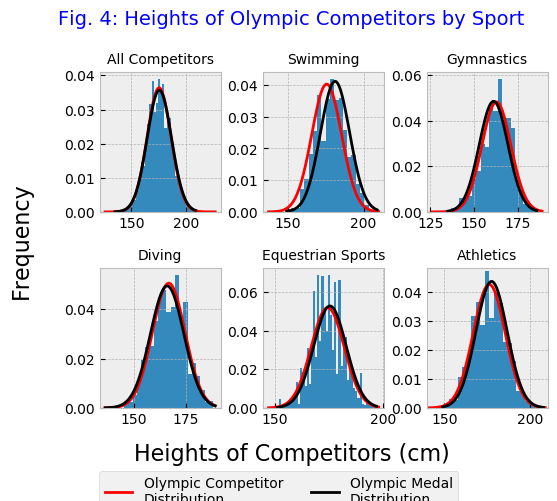

In [23]:
# Create subplots comparing normal distribution of height of olympic competitors, separated by sport
# Set chart size/style
plt.figure(figsize=(15,8.5))
plt.style.use('bmh')

fig = plt.figure()
fig, ax = plt.subplots(2, 3)

# Histogram of Olympian's heights at competition
plt.subplot(2, 3, 1)
plt.hist(summer_olympics.Height, bins=50, density=True)
plt.title('All Competitors', fontsize=10)

# overlay of normal distribution for all olympians
so_height = summer_olympics[['Height']]
x = np.linspace(np.min(so_height) - 1, np.max(so_height) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(so_height), scale=np.std(so_height)) for _ in x]
plt.plot(x, pdf, 'k-', color='red')

# overlay of distribution for all medalists
mds_height = md[['Height']]
x = np.linspace(np.min(mds_height) - 1, np.max(mds_height) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(mds_height), scale=np.std(mds_height)) for _ in x]
plt.plot(x, pdf, 'k-')


# Histogram of Swimmers' height at competition
plt.subplot(2, 3, 2)
plt.hist(swim.Height, bins=25, density=True)
plt.title('Swimming', fontsize=10)

# Overlay of normal distribution for swimming
sw_height = swim[['Height']]
x = np.linspace(np.min(sw_height) - 1, np.max(sw_height) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(so_height), scale=np.std(sw_height)) for _ in x]
plt.plot(x, pdf, 'k-', color='red')

# Overlay of normal distribution for swimming medalists
mds_height = swim_medals[['Height']]
x = np.linspace(np.min(mds_height) - 1, np.max(mds_height) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(mds_height), scale=np.std(mds_height)) for _ in x]
plt.plot(x, pdf, 'k-')

# Histogram of gymnasts' height at competition
plt.subplot(2, 3, 3)
plt.hist(gymnastics.Height, bins=25, density=True)
plt.title('Gymnastics', fontsize=10)

# Overlay of normal distribution for gymnasts
gm_height = gymnastics[['Height']]
x = np.linspace(np.min(gm_height) - 1, np.max(gm_height) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(gm_height), scale=np.std(gm_height)) for _ in x]
plt.plot(x, pdf, 'k-', color='red')

# Overlay of normal distribution for medaling gymnasts
mdg_height = gymnastics_medals[['Height']]
x = np.linspace(np.min(mdg_height) - 1, np.max(mdg_height) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(mdg_height), scale=np.std(mdg_height)) for _ in x]
plt.plot(x, pdf, 'k-')

# Histogram of divers' height at competition
plt.subplot(2, 3, 4)
plt.hist(diving.Height, bins=25, density=True)
plt.title('Diving', fontsize=10)

# Overlay of normal distribution for divers
dv_height = diving[['Height']]
x = np.linspace(np.min(dv_height) - 1, np.max(dv_height) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(dv_height), scale=np.std(dv_height)) for _ in x]
plt.plot(x, pdf, 'k-', color='red')

# Overlay of normal distribution for medaling divers
mdd_height = diving_medals[['Height']]
x = np.linspace(np.min(mdd_height) - 1, np.max(mdd_height) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(mdd_height), scale=np.std(mdd_height)) for _ in x]
plt.plot(x, pdf, 'k-')

# Histogram of Equestrian competitors' height at competition
plt.subplot(2, 3, 5)
plt.hist(eques.Height, bins=50, density=True)
plt.title('Equestrian Sports', fontsize=10)

# Overlay of normal distribution for equestrian competitors
eq_height = eques[['Height']]
x = np.linspace(np.min(eq_height) - 1, np.max(eq_height) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(eq_height), scale=np.std(eq_height)) for _ in x]
plt.plot(x, pdf, 'k-', color='red')

# Overlay of normal distribution for medaling equestrian competitors
mde_height = eques_medals[['Height']]
x = np.linspace(np.min(mde_height) - 1, np.max(mde_height) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(mde_height), scale=np.std(mde_height)) for _ in x]
plt.plot(x, pdf, 'k-')


# Histogram of athletics competitors' height at competition
plt.subplot(2, 3, 6)
plt.hist(athletics.Height, bins=25, density=True)
plt.title('Athletics', fontsize=10)

#Overlay of normal distribution for athletics competitors
at_height = athletics[['Height']]
x = np.linspace(np.min(at_height) - 1, np.max(at_height) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(at_height), scale=np.std(at_height)) for _ in x]
plt.plot(x, pdf, 'k-', color='red')

# Overlay of distribution for athletics medalists
mda_height = athletics_medals[['Height']]
x = np.linspace(np.min(mda_height) - 1, np.max(mda_height) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(mda_height), scale=np.std(mda_height)) for _ in x]
plt.plot(x, pdf, 'k-')

# Title for Figure/Labels for axes
fig.suptitle('Fig. 4: Heights of Olympic Competitors by Sport', fontsize=14, color='blue')
fig.legend(('Olympic Competitor\nDistribution', 'Olympic Medal\nDistribution'), 
           loc='lower center', ncol=2, borderaxespad=-0.8)
plt.margins(0.02)
fig.text(0.5, 0.04, 'Heights of Competitors (cm)', fontsize=16, ha='center')
fig.text(0.06, 0.5, 'Frequency', fontsize=16, va='center', rotation='vertical')

plt.subplots_adjust(left= 0.2, top=0.85, bottom=0.15, wspace=0.35, hspace=0.4)


plt.show()

In Figure 4, the heights of the olympic competitors were charted (blue histogram), then the normal curve was laid over each set of data. The black curve represents the olympic distribution for the olympic medalists in that sport while the red curve is the normal distribution line for all of that sport's competing athletes. 

**All Competitors**: Looking at the medal data for all competitors (black curve), it is clear that athletes who medal are slightly taller than the average olympic athlete who is 170 cm tall. Additionally, the narrower distribution of the curve suggests a narrower range of height, peaking at 175.75 cm. 

**Swimming**: Given that the best swimmers have often been tall, it is not surprising to find that the mean height of an olympic medalist for swimming is 181 cm, or 11 cm above the median height for olympians. What is surprising is that the medalist swimmers are taller than the average olympic swimmers. 

**Gymnastics**: Gymnastics also offers some surprising results. The mean height for an olympic medaling gymnast is 161.25 cm, compared to the slightly taller average of 162.85 cm. Shorter gymnasts seem to medal more often, thus the slight move of the curve to the left for medalists.  

**Diving**: The distribution for diving medalists is very closely aligned with the distribution curve of all olympic divers; there is less than 1 cm of difference in height from the average medalist compared to the average olympic diver. 

**Equestrian sports**: The height distribution for equestrian athletes and medaling equestrian athletes is approximately the same- there is approximately one centimeter difference in height between medalists and the mean for all competing equestrian athletes. Equestrian athletes are slightly taller than the average olympian, at 175 cm compared to 170 cm. 

**Athletics**: The mean height for medaling athletics competitors (177.6 cm) is also rather close to the mean height for all athletics competitors (176.27 cm). There is a very slight shift in the curve for medaling athletics olympians, caused by this difference at all heights; for example, the shortest athletics medalist was 150 cm in height while the shortest competitor was 142 cm in height.  

<Figure size 1500x850 with 0 Axes>

<Figure size 640x480 with 0 Axes>

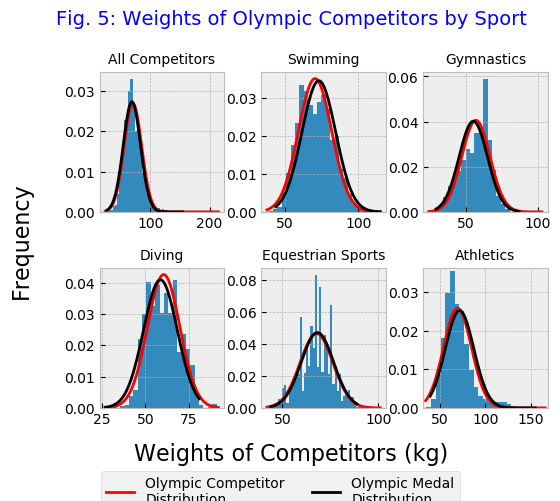

In [24]:
# Create subplots comparing normal distribution of weights of olympic competitors, separated by sport
# Set chart size/style
plt.figure(figsize=(15,8.5))
plt.style.use('bmh')

fig = plt.figure()
fig, ax = plt.subplots(2, 3)

# Histogram of Olympian's weights at competition
plt.subplot(2, 3, 1)
plt.hist(summer_olympics.Weight, bins=50, density=True)
plt.title('All Competitors', fontsize=10)

# overlay of normal distribution for weight of all olympians
so_weight = summer_olympics[['Weight']]
x = np.linspace(np.min(so_weight) - 1, np.max(so_weight) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(so_weight), scale=np.std(so_weight)) for _ in x]
plt.plot(x, pdf, 'k-', color='red')

# overlay of distribution for all olympic medalists
md_weight = md[['Weight']]
x = np.linspace(np.min(md_weight) - 1, np.max(md_weight) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(md_weight), scale=np.std(md_weight)) for _ in x]
plt.plot(x, pdf, 'k-')

# Histogram of Swimmers' weight at competition
plt.subplot(2, 3, 2)
plt.hist(swim.Weight, bins=25, density=True)
plt.title('Swimming', fontsize=10)

# Overlay of normal distribution for swimming
sw_weight = swim[['Weight']]
x = np.linspace(np.min(sw_weight) - 1, np.max(sw_weight) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(so_weight), scale=np.std(sw_weight)) for _ in x]
plt.plot(x, pdf, 'k-', color='red')

# Overlay of normal distribution for swimming medalists
mds_weight = swim_medals[['Weight']]
x = np.linspace(np.min(mds_weight) - 1, np.max(mds_weight) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(mds_weight), scale=np.std(mds_weight)) for _ in x]
plt.plot(x, pdf, 'k-')

# Histogram of gymnasts' weight at competition
plt.subplot(2, 3, 3)
plt.hist(gymnastics.Weight, bins=25, density=True)
plt.title('Gymnastics', fontsize=10)

# Overlay of normal distribution for gymnasts
gm_weight = gymnastics[['Weight']]
x = np.linspace(np.min(gm_weight) - 1, np.max(gm_weight) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(gm_weight), scale=np.std(gm_weight)) for _ in x]
plt.plot(x, pdf, 'k-', color='red')

# Overlay of normal distribution gymnastics medalists
mdg_weight = gymnastics_medals[['Weight']]
x = np.linspace(np.min(mdg_weight) - 1, np.max(mdg_weight) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(mdg_weight), scale=np.std(mdg_weight)) for _ in x]
plt.plot(x, pdf, 'k-')

# Histogram of divers' weight at competition
plt.subplot(2, 3, 4)
plt.hist(diving.Weight, bins=25, density=True)
plt.title('Diving', fontsize=10)

# Overlay of normal distribution for divers
dv_weight = diving[['Weight']]
x = np.linspace(np.min(dv_weight) - 1, np.max(dv_weight) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(dv_weight), scale=np.std(dv_weight)) for _ in x]
plt.plot(x, pdf, 'k-', color='red')

# Overlay of normal distribution for diving medalists
mdd_weight = diving_medals[['Weight']]
x = np.linspace(np.min(mdd_weight) - 1, np.max(mdd_weight) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(mdd_weight), scale=np.std(mdd_weight)) for _ in x]
plt.plot(x, pdf, 'k-')

# Histogram of Equestrian competitors' weight at competition
plt.subplot(2, 3, 5)
plt.hist(eques.Weight, bins=50, density=True)
plt.title('Equestrian Sports', fontsize=10)

# Overlay of normal distribution for equestrian competitors
eq_weight = eques[['Weight']]
x = np.linspace(np.min(eq_weight) - 1, np.max(eq_weight) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(eq_weight), scale=np.std(eq_weight)) for _ in x]
plt.plot(x, pdf, 'k-', color='red')

# Overlay of normal distribution for equestrian medalists
mde_weight = eques_medals[['Weight']]
x = np.linspace(np.min(mde_weight) - 1, np.max(mde_weight) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(mde_weight), scale=np.std(mde_weight)) for _ in x]
plt.plot(x, pdf, 'k-')


# Histogram of athletics competitors' weight at competition
plt.subplot(2, 3, 6)
plt.hist(athletics.Weight, bins=25, density=True)
plt.title('Athletics', fontsize=10)

#Overlay of normal distribution for athletics competitors
at_weight = athletics[['Weight']]
x = np.linspace(np.min(at_weight) - 1, np.max(at_weight) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(at_weight), scale=np.std(at_weight)) for _ in x]
plt.plot(x, pdf, 'k-', color='red')

# Overlay of distribution for athletics medalists
mda_weight = athletics_medals[['Weight']]
x = np.linspace(np.min(mda_weight) - 1, np.max(mda_weight) + 1, 70, endpoint=True)
pdf = [stats.norm.pdf(_, loc=np.mean(mda_weight), scale=np.std(mda_weight)) for _ in x]
plt.plot(x, pdf, 'k-')

# Title for Figure/Labels for axes
fig.suptitle('Fig. 5: Weights of Olympic Competitors by Sport', fontsize=14, color='blue')
fig.legend(('Olympic Competitor\nDistribution', 'Olympic Medal\nDistribution'), 
           loc='lower center', ncol=2, borderaxespad=-0.8)
plt.margins(0.02)
fig.text(0.5, 0.04, 'Weights of Competitors (kg)', fontsize=16, ha='center')
fig.text(0.06, 0.5, 'Frequency', fontsize=16, va='center', rotation='vertical')

plt.subplots_adjust(left= 0.2, top=0.85, bottom=0.15, wspace=0.3, hspace=0.4)


plt.show()

In Figure 5, the weights of the olympic competitors were charted (blue histogram), then the normal curve was laid over each set of data. The black curve represents the olympic distribution for the olympic medalists in that sport while the red curve is the normal distribution line for all of that sport's competing athletes. 

**All Competitors**: The distribution for all olympians is close to the distribution for all medaling olympians for weight. The mean weight of a medalling olympian is 68.9 kg while the mean weight of all olympians is 70.67 kg. As you can see in Figure 5, the curves overlap except at the peak, where the means are slightly different. 

**Swimming**: As with height, the curve for weight of olympic swimming medalists is slightly offset to the right from the distribution curve for the weight of all olympic swimmers. The mean for the average olympic swimmer is 70.59 kg while the mean weight for a medalis is 73.25 kg. This difference makes sense as the average medalist for swimming is taller than the average olympic swimmer.

**Gymnastics**:  Similarly, the curve for gymnastics medalists is shifted to the left, with the average gymnastics medalist weighing 55.07 kg, compared to the overall average of 58.89 kg. This is not surprising as the height of gymnastics medalists was found to be slightly shorter than the average competing olympic gymnast. 

**Diving**: There was a difference between the curves for diving, which was unexpected as the distribution curves for height were very similar. Diving medalists have a mean weight of 58.69 kg while the average competing olympic diver has a higher weight average of 60.57 kg. 

**Equestrian sports**: The distribution for medaling equestrian athletes and all equestrian athletes is approximately the same, indicating that an athlete's weight may not have a significant impact on their ability to medal in the sport. 

**Athletics**: Since the height curve for athletics medalists was slightly shifted to the right from the average, it is not surprising that the weight curve for athletics medalists is also slightly shifted to the right. The average athletics competitor had a weight of 69.27 kg while the average athletics medalist had a weight of 71.51 kg. 

<Figure size 1500x850 with 0 Axes>

<Figure size 640x480 with 0 Axes>

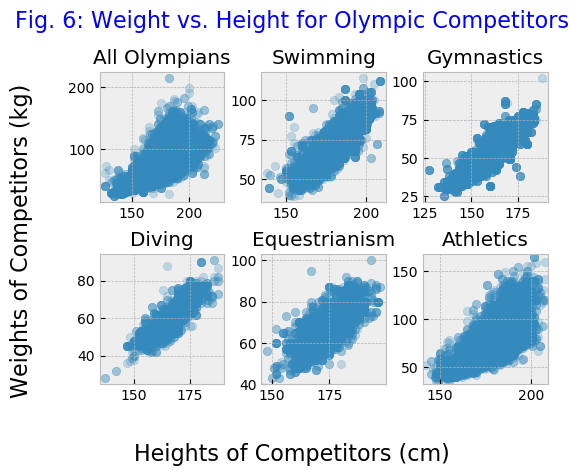

In [25]:
# Compare Weight vs. Height of athletes for each sport
# Set chart size/style
plt.figure(figsize=(15,8.5))
plt.style.use('bmh')

fig = plt.figure()
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)

# 
plt.subplot(2, 3, 1)
plt.scatter(x='Height', y='Weight', data=summer_olympics, alpha=0.25)
plt.title('All Olympians')

plt.subplot(2, 3, 2)
plt.scatter(x='Height', y='Weight', data=swim, alpha=0.25)
plt.title('Swimming')

plt.subplot(2, 3, 3)
plt.scatter(x='Height', y='Weight', data=gymnastics, alpha=0.25)
plt.title('Gymnastics')

plt.subplot(2, 3, 4)
plt.scatter(x='Height', y='Weight', data=diving, alpha=0.25)
plt.title('Diving')

plt.subplot(2, 3, 5)
plt.scatter(x='Height', y='Weight', data=eques, alpha=0.25)
plt.title('Equestrianism')

plt.subplot(2, 3, 6)
plt.scatter(x='Height', y='Weight', data=athletics, alpha=0.25)
plt.title('Athletics')

# Title for Figure/Labels for axes
fig.suptitle('Fig. 6: Weight vs. Height for Olympic Competitors', fontsize=16, color='blue')
plt.margins(0.02)
fig.text(0.5, 0.04, 'Heights of Competitors (cm)', fontsize=16, ha='center')
fig.text(0.06, 0.5, 'Weights of Competitors (kg)', fontsize=16, va='center', rotation='vertical')

plt.subplots_adjust(left= 0.2, top=0.85, bottom=0.2, wspace=0.3, hspace=0.4)

plt.show()

After reviewing the histograms and pair plots, there seemed to be a link between weight and height for competitors. This was better examined by plotting all of the data by sport above. Based on the scatter plot above, there is indeed a positive correlation between weight and height of olympians. 

To determine if this has any impact on medalists, the medalists data was then laid on top of the previous chart in orange, creating Figure 7. 

<Figure size 1500x850 with 0 Axes>

<Figure size 640x480 with 0 Axes>

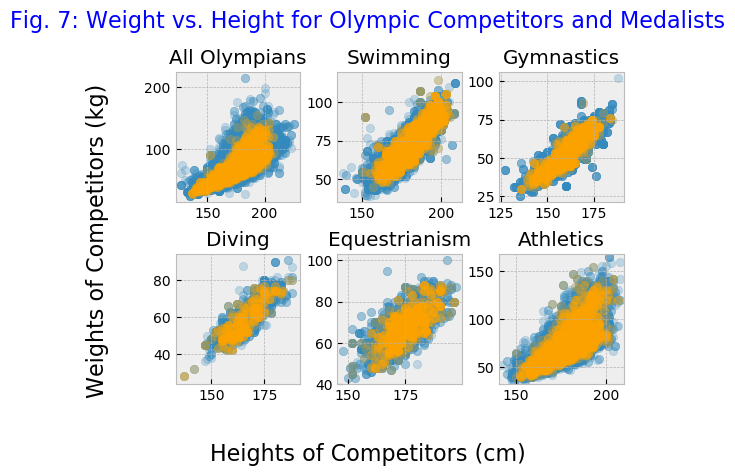

In [26]:
# Compare Weight vs. Height of athletes for each sport including medalists
# Set chart size/style
plt.figure(figsize=(15,8.5))
plt.style.use('bmh')

fig = plt.figure()
fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)

# 
plt.subplot(2, 3, 1)
plt.scatter(x='Height', y='Weight', data=summer_olympics, alpha=0.25)
plt.scatter(x='Height', y='Weight', data=md, alpha=0.25, c='orange')
plt.title('All Olympians')

plt.subplot(2, 3, 2)
plt.scatter(x='Height', y='Weight', data=swim, alpha=0.25)
plt.scatter(x='Height', y='Weight', data=swim_medals, alpha=0.25, c='orange')
plt.title('Swimming')

plt.subplot(2, 3, 3)
plt.scatter(x='Height', y='Weight', data=gymnastics, alpha=0.25)
plt.scatter(x='Height', y='Weight', data=gymnastics_medals, alpha=0.25, c='orange')
plt.title('Gymnastics')

plt.subplot(2, 3, 4)
plt.scatter(x='Height', y='Weight', data=diving, alpha=0.25)
plt.scatter(x='Height', y='Weight', data=diving_medals, alpha=0.25, c='orange')
plt.title('Diving')

plt.subplot(2, 3, 5)
plt.scatter(x='Height', y='Weight', data=eques, alpha=0.25)
plt.scatter(x='Height', y='Weight', data=eques_medals, alpha=0.25, c='orange')
plt.title('Equestrianism')

plt.subplot(2, 3, 6)
plt.scatter(x='Height', y='Weight', data=athletics, alpha=0.25)
plt.scatter(x='Height', y='Weight', data=athletics_medals, alpha=0.25, c='orange')
plt.title('Athletics')

# Title for Figure/Labels for axes
fig.suptitle('Fig. 7: Weight vs. Height for Olympic Competitors and Medalists', fontsize=16, color='blue')
plt.margins(0.02)
fig.text(0.5, 0.04, 'Heights of Competitors (cm)', fontsize=16, ha='center')
fig.text(0.06, 0.5, 'Weights of Competitors (kg)', fontsize=16, va='center', rotation='vertical')

plt.subplots_adjust(left= 0.2, top=0.85, bottom=0.2, wspace=0.3, hspace=0.4)

plt.show()

From Figure 7, we see that the weight/height correlation is even stronger for olympic medalists, colored in orange. Although there are a few outliers within each group, the majority of medalists demonstrate a linear relationship between weight and height. 

In [34]:
# Calculate correlation coefficients for each subplot in Figure 7

# Correlation coefficient for all olympians
sum = np.corrcoef(summer_olympics.Weight, summer_olympics.Height)[1,0]
sum_md = np.corrcoef(md.Weight, md.Height)[1,0]

# Correlation coefficients for swimming
sw = np.corrcoef(swim.Weight, swim.Height)[1,0]
swim_md = np.corrcoef(swim_medals.Weight, swim_medals.Height)[1,0]

# Correlation coefficients for gymnastics
gym = np.corrcoef(gymnastics.Weight, gymnastics.Height)[1,0]
gym_md = np.corrcoef(gymnastics_medals.Weight, gymnastics_medals.Height)[1,0]

# Correlation coefficients for diving
div = np.corrcoef(diving.Weight, diving.Height)[1,0]
div_md = np.corrcoef(diving_medals.Weight, diving_medals.Height)[1,0]

# Correlation coefficietns for Equestrianism
equ = np.corrcoef(eques.Weight, eques.Height)[1,0]
equ_md = np.corrcoef(eques_medals.Weight, eques_medals.Height)[1,0]

# Correlatioin coefficients for Athletics
at = np.corrcoef(athletics.Weight, athletics.Height)[1,0]
at_md = np.corrcoef(athletics_medals.Weight, athletics_medals.Height)[1,0]

print('Correlation coefficients are: \n\n')
print('All olympians: {}\nAll medalists: {}\n'.format(sum, sum_md))
print('All swimmers: {}\nAll swim medalists: {}\n'.format(sw, swim_md))
print('All gymnasts: {}\nAll medaling gymnasts: {}\n'.format(gym, gym_md))
print('All divers: {}\nAll diving medalists: {}\n'.format(div, div_md))
print('All equestrian: {}\nAll medaling equestrian: {}\n'.format(equ, equ_md))
print('All athletics: {}\nAll athletics medalists: {}'.format(at, at_md))

Correlation coefficients are: 


All olympians: 0.7951829879446276
All medalists: 0.8264389506436125

All swimmers: 0.8641544318061678
All swim medalists: 0.8686674253703217

All gymnasts: 0.8685604639405766
All medaling gymnasts: 0.8823807158901634

All divers: 0.8472265225606195
All diving medalists: 0.8630097474468192

All equestrian: 0.713882219336882
All medaling equestrian: 0.7111431538751471

All athletics: 0.753208225239584
All athletics medalists: 0.7553004982679002


For five of the six groups of correlation coefficient calculations, the correlation coefficient increased when data was restricted from the general population of athletes to the medalist athlets, with gymnastics showing the largest sport-specific increase in correlation, followed by swimming. The largest increase in correlation occured when the data was narrowed from all olympians to all medalists. 

The only group to experience a decline in correlation between height and weight was the equestrian athletes. Although the decrease was small (0.002), it suggests that height/weight is less important to a competitor's ability to medal in the sport. 

### 7. Transforming categorical columns into binomial values

The next step in looking at the data was to transform the categorical columns of 'Sex', 'Medals', and 'Sports' into binomial categories so that they could be analyzed in regressions as well as used for predictive modeling. These columns were selected as they each have clear impacts on the data. 

The NOC column was not transformed as some olympic competitors are able to choose the team they participate on for the competitions based on their family background. As each country's olympic committee sets the standard for participation in their team and not all teams require participants to be residents or citizens from that area, this column was deliberately left alone. 

In [15]:
# Create dummy columns for categorical variables
sex = pd.get_dummies(summer_olympics['Sex'])
medals = pd.get_dummies(summer_olympics['Medal'])
sports = pd.get_dummies(summer_olympics['Sport'])
nocs = pd.get_dummies(summer_olympics['NOC'])

In [16]:
# Concatenate dummy columns with summer olympics dataset
sum_olympics = pd.concat([summer_olympics, sex, medals], axis=1)
sum_olympics.head()

ID                Name Sex   Age  Height  Weight     Team  NOC  \
0    1           A Dijiang   M  24.0   180.0    80.0    China  CHN   
1    2            A Lamusi   M  23.0   170.0    60.0    China  CHN   
31  12   Jyri Tapani Aalto   M  31.0   172.0    70.0  Finland  FIN   
32  13  Minna Maarit Aalto   F  30.0   159.0    55.5  Finland  FIN   
33  13  Minna Maarit Aalto   F  34.0   159.0    55.5  Finland  FIN   

          Games  Year   ...         Sport                         Event Medal  \
0   1992 Summer  1992   ...    Basketball   Basketball Men's Basketball   NaN   
1   2012 Summer  2012   ...          Judo  Judo Men's Extra-Lightweight   NaN   
31  2000 Summer  2000   ...     Badminton       Badminton Men's Singles   NaN   
32  1996 Summer  1996   ...       Sailing    Sailing Women's Windsurfer   NaN   
33  2000 Summer  2000   ...       Sailing    Sailing Women's Windsurfer   NaN   

     region notes  F  M  Bronze  Gold  Silver  
0     China   NaN  0  1       0     0       0  
1     China   NaN  0  1       0     0       0  
31  Finland   NaN  0  1       0     0       0  
32  Finland   NaN  1  0       0     0       0  
33  Finland   NaN  1  0       0     0       0  

[5 rows x 22 columns]

In [17]:
# Concatenate sports dummy columns to dataset
sum_olymp = pd.concat([sum_olympics, sports], axis=1)
sum_olymp.head()

ID                Name Sex   Age  Height  Weight     Team  NOC  \
0    1           A Dijiang   M  24.0   180.0    80.0    China  CHN   
1    2            A Lamusi   M  23.0   170.0    60.0    China  CHN   
31  12   Jyri Tapani Aalto   M  31.0   172.0    70.0  Finland  FIN   
32  13  Minna Maarit Aalto   F  30.0   159.0    55.5  Finland  FIN   
33  13  Minna Maarit Aalto   F  34.0   159.0    55.5  Finland  FIN   

          Games  Year    ...     Table Tennis Taekwondo Tennis Trampolining  \
0   1992 Summer  1992    ...                0         0      0            0   
1   2012 Summer  2012    ...                0         0      0            0   
31  2000 Summer  2000    ...                0         0      0            0   
32  1996 Summer  1996    ...                0         0      0            0   
33  2000 Summer  2000    ...                0         0      0            0   

   Triathlon Tug-Of-War Volleyball  Water Polo  Weightlifting  Wrestling  
0          0          0          0           0              0          0  
1          0          0          0           0              0          0  
31         0          0          0           0              0          0  
32         0          0          0           0              0          0  
33         0          0          0           0              0          0  

[5 rows x 65 columns]

In [18]:
so = pd.concat([sum_olymp, nocs], axis=1)
so.head()

ID                Name Sex   Age  Height  Weight     Team  NOC  \
0    1           A Dijiang   M  24.0   180.0    80.0    China  CHN   
1    2            A Lamusi   M  23.0   170.0    60.0    China  CHN   
31  12   Jyri Tapani Aalto   M  31.0   172.0    70.0  Finland  FIN   
32  13  Minna Maarit Aalto   F  30.0   159.0    55.5  Finland  FIN   
33  13  Minna Maarit Aalto   F  34.0   159.0    55.5  Finland  FIN   

          Games  Year ...  VIE VIN VNM WIF YAR YEM YMD  YUG  ZAM  ZIM  
0   1992 Summer  1992 ...    0   0   0   0   0   0   0    0    0    0  
1   2012 Summer  2012 ...    0   0   0   0   0   0   0    0    0    0  
31  2000 Summer  2000 ...    0   0   0   0   0   0   0    0    0    0  
32  1996 Summer  1996 ...    0   0   0   0   0   0   0    0    0    0  
33  2000 Summer  2000 ...    0   0   0   0   0   0   0    0    0    0  

[5 rows x 291 columns]

In [19]:
so.shape

(166706, 291)